# Mini-project 3
Assess characteristics of applicants that will be more likely to use a pre-paid card.
## Group 1

In [1]:
# imports
import pandas as pd

In [2]:
# Read the data
data = pd.read_csv('CFPB-financial-wellness-data.csv')
len(data)

6394

In [3]:
# get the count of each column
data.count().min()

6394

In [4]:
# check to see if there are any NA
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
len(data)

6394

In [31]:
# get the number of 1s and 0s for each column
data['PRODUSE_3'].value_counts()

0    5834
1     560
Name: PRODUSE_3, dtype: int64

**Cleaning Data Outliers**

In [5]:
# clean the HOUSERANGES column
# map 98 -> -1 OR 99 -> -1
data['HOUSERANGES'] = data['HOUSERANGES'].map(lambda x: -1 if x == 98 or x == 99 else x)
data['VALUERANGES'] = data['VALUERANGES'].map(lambda x: -1 if x == 98 or x == 99 else x)
data['MORTGAGE'] = data['MORTGAGE'].map(lambda x: -1 if x == 98 or x == 99 else x)
data['SAVINGSRANGES'] = data['SAVINGSRANGES'].map(lambda x: -1 if x == 98 or x == 99 else x)
data['SNAP'] = data['SNAP'].map(lambda x: -1 if x == 8 else x)
data['COLLECT'] = data['COLLECT'].map(lambda x: -1 if x == 8 else x)
data['ABSORBSHOCK'] = data['ABSORBSHOCK'].map(lambda x: -1 if x == 8 else x)
data['FRAUD2'] = data['FRAUD2'].map(lambda x: -1 if x == 8 else x)
data['HSLOC'] = data['HSLOC'].map(lambda x: -1 if x == 8 else x)
data['EMPLOY'] = data['EMPLOY'].map(lambda x: -1 if x == 99 else x)
data['SOCSEC2'] = data['SOCSEC2'].map(lambda x: x-60 if x >= 60 else x)
data['SOCSEC3'] = data['SOCSEC3'].map(lambda x: x-60 if x >= 60 else x)

**Finding the 20 Predictor Variables to Use**

In [6]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Dropping columns that won't be used
data.drop(['PUF_ID', 'finalwt', 'sample', 'PRODUSE_6','PPETHM','PPGENDER','IMPUTATION_FLAG'], axis=1, inplace=True)
X = data.drop('PRODUSE_3', axis=1)
y = data['PRODUSE_3']


# Test, Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
model = SelectFromModel(ridge, prefit=True, max_features=20)
X_new = model.transform(X_train)

mask = model.get_support()

selected_features = list(X_train.columns[mask])

print(selected_features)

['FINKNOWL1', 'FINKNOWL3', 'KHKNOWL4', 'KH4correct', 'KH5correct', 'KH7correct', 'KH9correct', 'PRODHAVE_1', 'PRODHAVE_4', 'PRODUSE_1', 'MATHARDSHIP_6', 'SHOCKS_3', 'SHOCKS_5', 'SHOCKS_8', 'ON1correct', 'INTERCONNECTIONS_4', 'INTERCONNECTIONS_9', 'INTERCONNECTIONS_10', 'EMPLOY1_5', 'EMPLOY1_6']


/Users/vedanshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [8]:
# Using only the 20 selected variables from the above ridge
X_train1 = X_train[['FINKNOWL1', 'FINKNOWL3', 'KHKNOWL4', 'KH4correct','KH5correct', 'KH7correct', 'KH9correct', 'PRODHAVE_1', 'PRODHAVE_4', 'PRODUSE_1', 'MATHARDSHIP_6', 'SHOCKS_3', 'SHOCKS_5', 'SHOCKS_8', 'ON1correct', 'INTERCONNECTIONS_4', 'INTERCONNECTIONS_9', 'INTERCONNECTIONS_10', 'EMPLOY1_5', 'EMPLOY1_6']]
X_test1 = X_test[['FINKNOWL1', 'FINKNOWL3', 'KHKNOWL4', 'KH4correct', 'KH5correct','KH7correct', 'KH9correct', 'PRODHAVE_1', 'PRODHAVE_4', 'PRODUSE_1', 'MATHARDSHIP_6', 'SHOCKS_3', 'SHOCKS_5', 'SHOCKS_8', 'ON1correct', 'INTERCONNECTIONS_4', 'INTERCONNECTIONS_9', 'INTERCONNECTIONS_10', 'EMPLOY1_5', 'EMPLOY1_6']]

In [9]:
# Checking the VIF to see if we have a multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# y = data["outcome_variable"]
model = sm.OLS(y_train, X_train1).fit()

# Compute the VIF for each predictor variable
vif = pd.DataFrame()
vif["variables"] = X_train1.columns
vif["VIF"] = [variance_inflation_factor(X_train1, i) for i in range(X_train1.shape[1])]
vif.set_index('variables', inplace=True)

# Print VIF values above 5
print(vif[vif["VIF"]>5])

                     VIF
variables               
FINKNOWL1       6.525155
FINKNOWL3      31.952708
KHKNOWL4       25.425995
KH4correct     17.352789
KH9correct     11.463399
PRODHAVE_1      7.536980
MATHARDSHIP_6  13.255332


In [10]:
# Use SelectKBest to find features with high predictive values

from sklearn.feature_selection import SelectKBest, f_regression

f_selector = SelectKBest(f_regression, k=20)
X_train_selected = f_selector.fit_transform(X_train, y_train)
selected_feature_indices = f_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print(selected_feature_names)

Index(['fpl', 'FWB2_3', 'MANAGE1_1', 'LMscore', 'KHscore', 'KH1correct',
       'KH2correct', 'ENDSMEET', 'HOUSING', 'VALUERANGES', 'MORTGAGE',
       'PRODHAVE_1', 'PRODHAVE_4', 'MATHARDSHIP_1', 'MATHARDSHIP_2',
       'MATHARDSHIP_3', 'ABSORBSHOCK', 'ON2correct', 'CONNECT', 'PPINCIMP'],
      dtype='object')


In [11]:
# Combining both methods of selecting variables to get 20 that don't have any VIF over 5
X_train = X_train[['FINKNOWL1', 'FWB2_3', 'KHscore', 'KH7correct', 'VALUERANGES', 'PRODUSE_1', 'SHOCKS_3', 'SHOCKS_5', 'SHOCKS_8', 'ON1correct', 'INTERCONNECTIONS_4', 'INTERCONNECTIONS_9', 'INTERCONNECTIONS_10', 'EMPLOY1_5', 'EMPLOY1_6','MORTGAGE','ON2correct','KH1correct','PRODHAVE_4']]
X_test = X_test[['FINKNOWL1', 'FWB2_3', 'KHscore', 'KH7correct', 'VALUERANGES', 'PRODUSE_1', 'SHOCKS_3', 'SHOCKS_5', 'SHOCKS_8', 'ON1correct', 'INTERCONNECTIONS_4', 'INTERCONNECTIONS_9', 'INTERCONNECTIONS_10', 'EMPLOY1_5', 'EMPLOY1_6','MORTGAGE','ON2correct','KH1correct','PRODHAVE_4']]

In [12]:
# Checking the VIF to see if we have a multicollinearity issue for the new set of variables2
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# y = data["outcome_variable"]
model = sm.OLS(y_train, X_train).fit()

# Compute the VIF for each predictor variable
vif = pd.DataFrame()
vif["variables"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif.set_index('variables', inplace=True)

# Print VIF values above 5
vif

,VIF
variables,
FINKNOWL1,4.791425
FWB2_3,4.452161
KHscore,2.303504
KH7correct,2.416502
VALUERANGES,4.333315
PRODUSE_1,1.075824
SHOCKS_3,1.031473
SHOCKS_5,1.189205
SHOCKS_8,1.021684


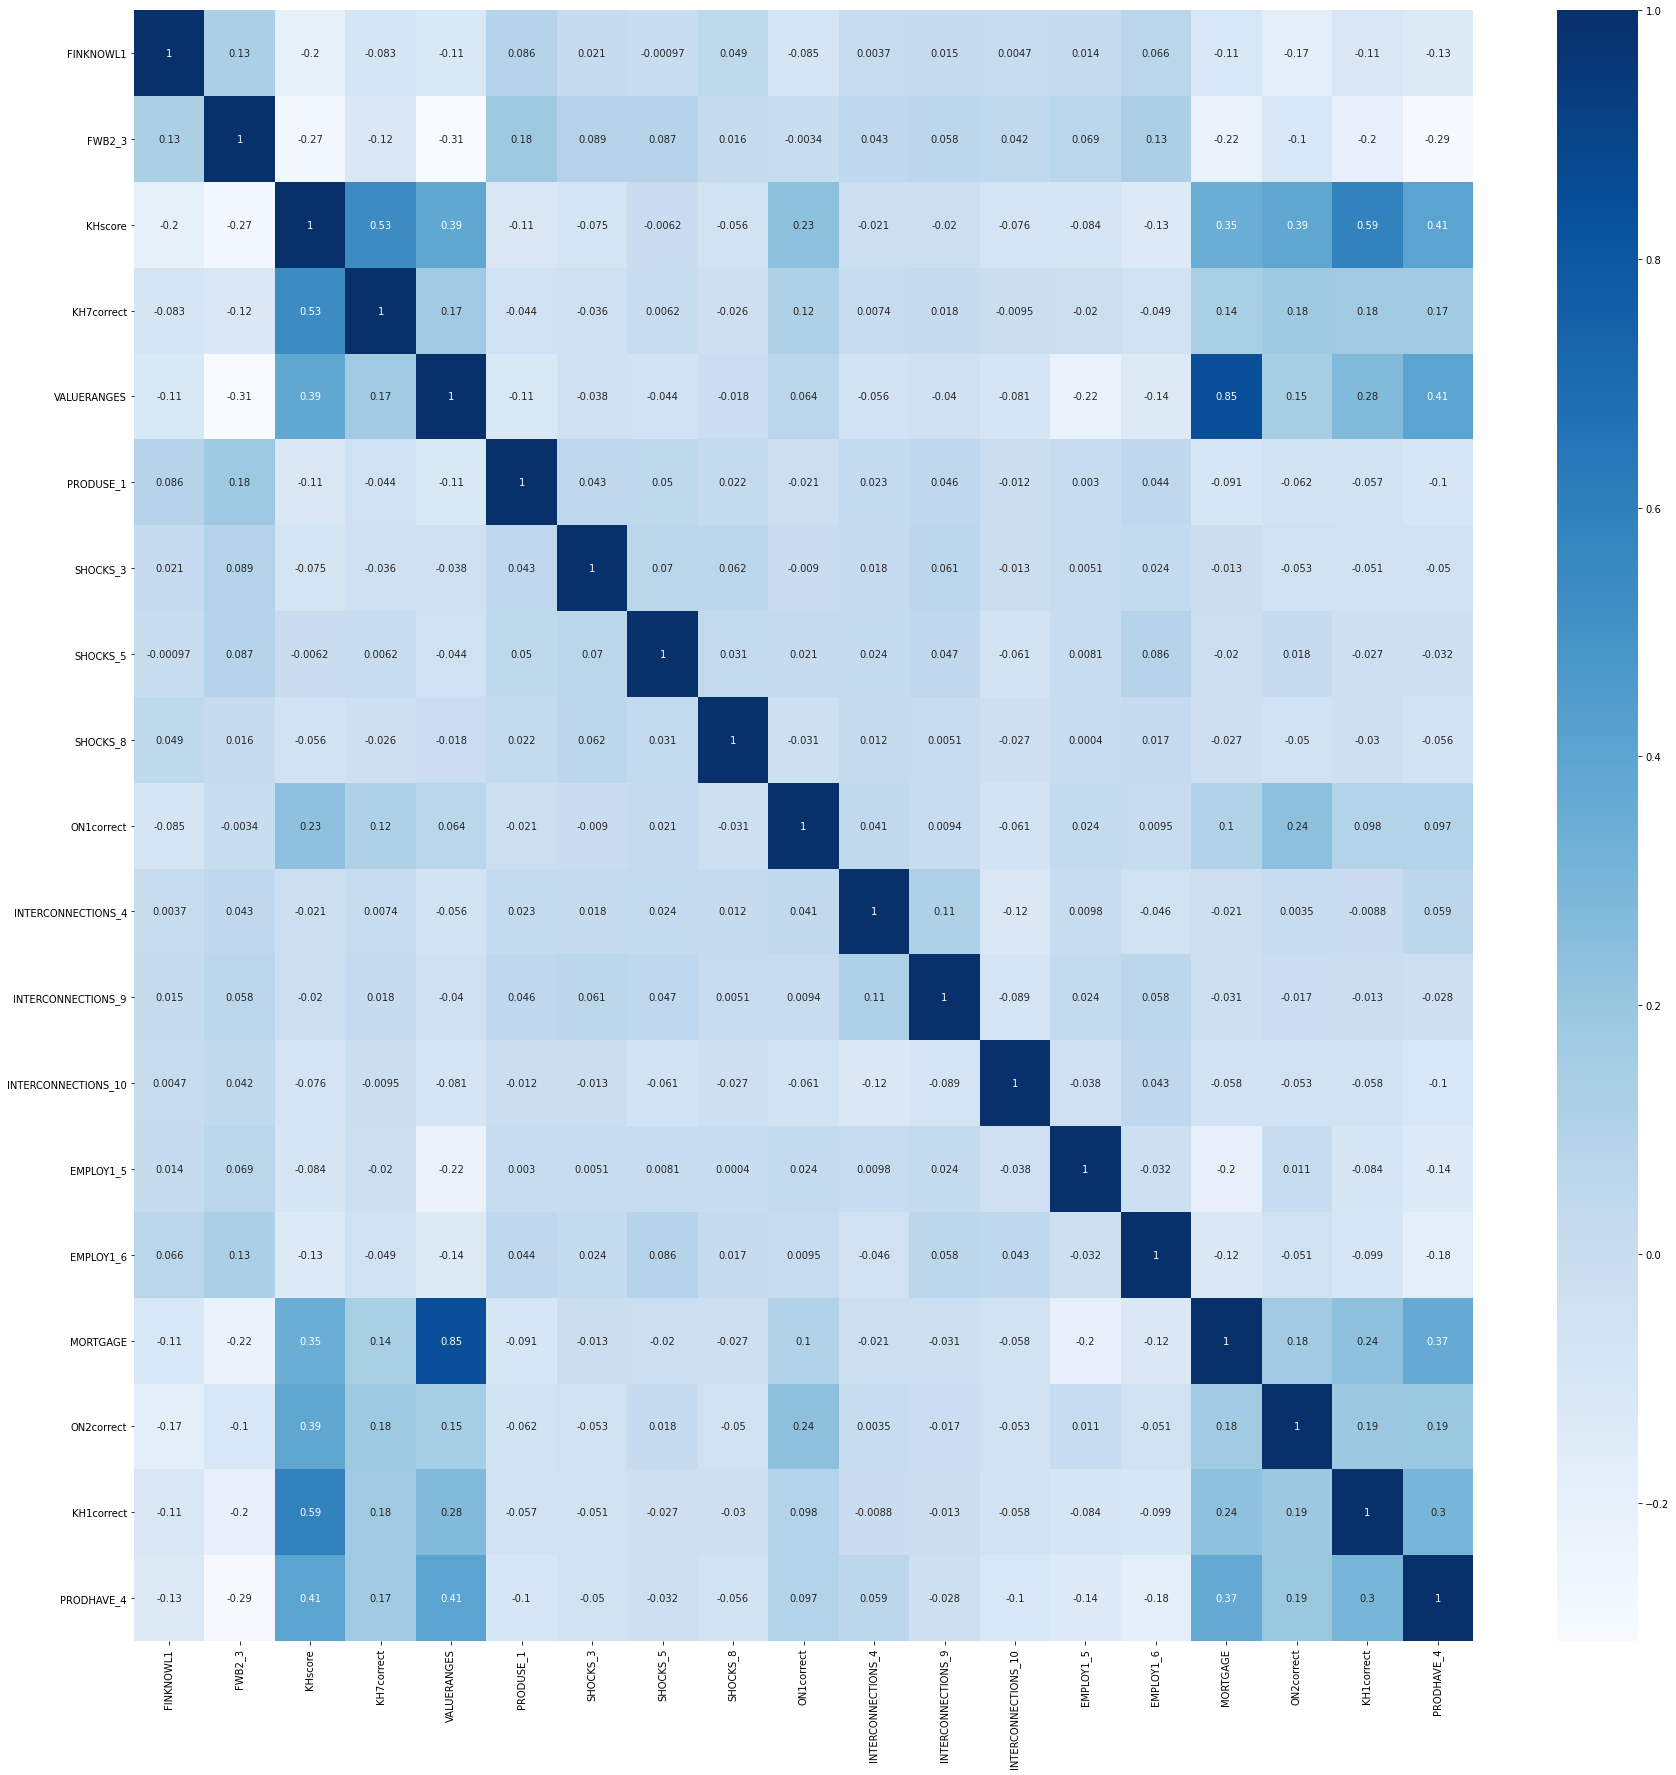

In [17]:
# Visualize the correlation among the 20 variables

import seaborn as sns
import matplotlib.pyplot as plt

# heatmap
sns.heatmap(X_train.corr(),annot=True, cmap='Blues')
plt.gcf().set_size_inches(30, 30)

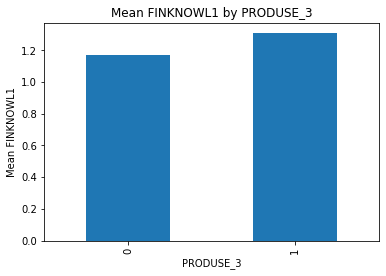

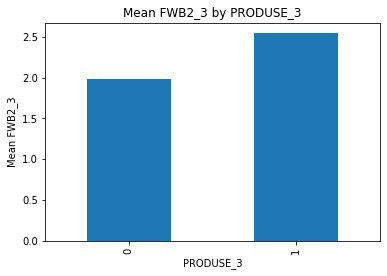

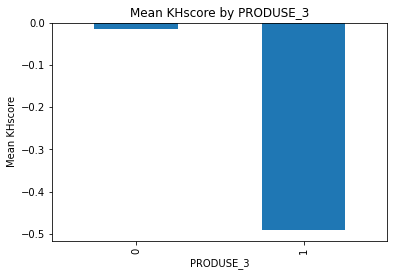

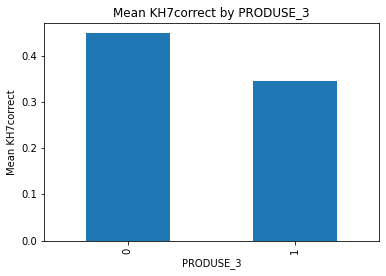

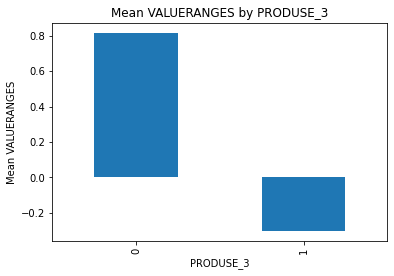

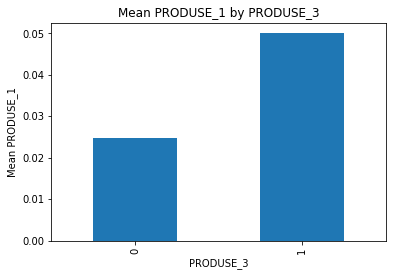

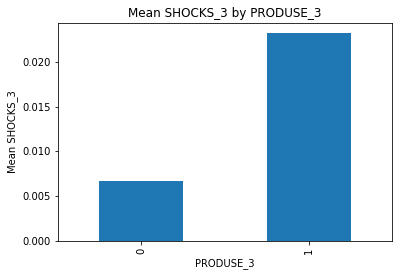

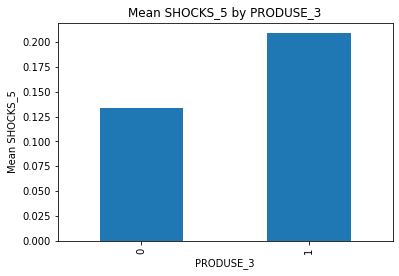

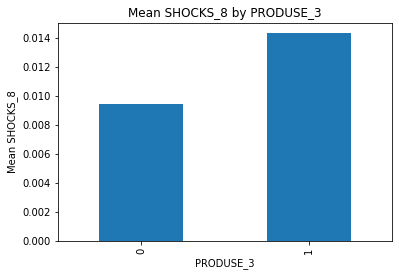

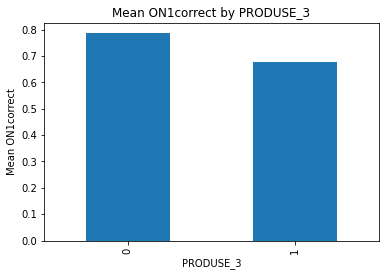

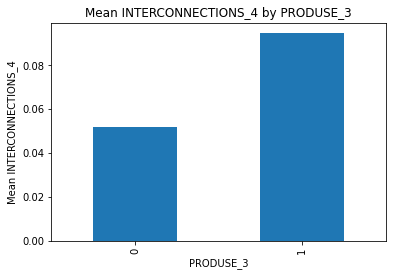

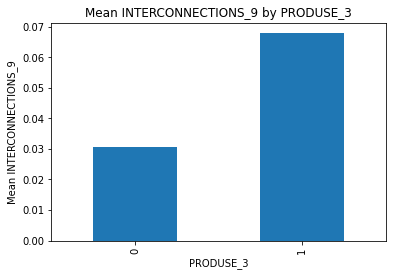

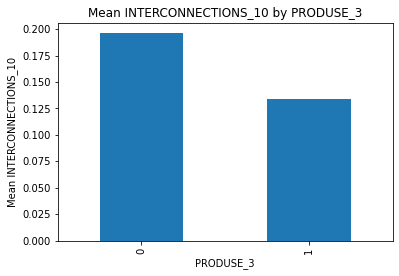

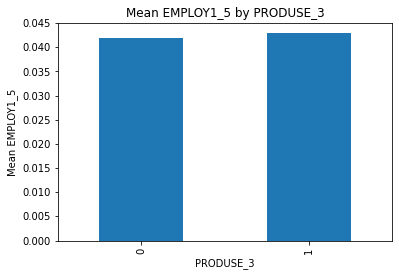

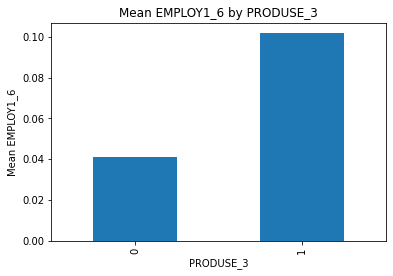

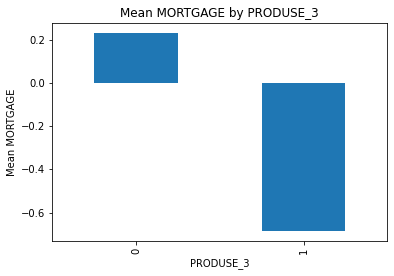

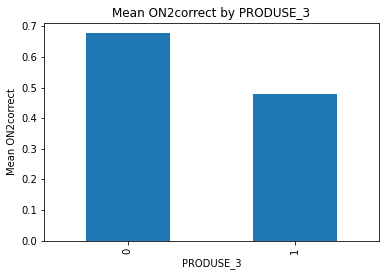

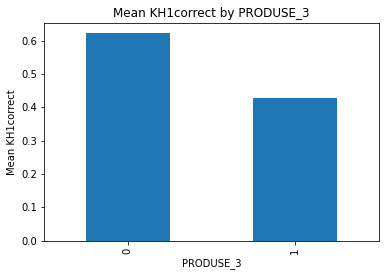

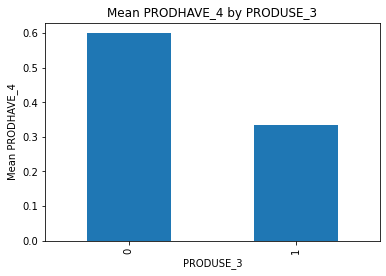

In [18]:
# visualizing the mean of each variable by PRODUSE_3
visual_data = data[['PRODUSE_3','FINKNOWL1', 'FWB2_3', 'KHscore', 'KH7correct', 'VALUERANGES', 'PRODUSE_1', 'SHOCKS_3', 'SHOCKS_5', 'SHOCKS_8', 'ON1correct', 'INTERCONNECTIONS_4', 'INTERCONNECTIONS_9', 'INTERCONNECTIONS_10', 'EMPLOY1_5', 'EMPLOY1_6','MORTGAGE','ON2correct','KH1correct','PRODHAVE_4']]

for col in visual_data.columns[1:]:
    means_df = visual_data.groupby('PRODUSE_3')[col].mean()
    means_df.plot(kind='bar')
    plt.title(f'Mean {col} by PRODUSE_3')
    plt.xlabel('PRODUSE_3')
    plt.ylabel(f'Mean {col}')
    plt.show()

**Models**

In [13]:
# Imports
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import sklearn.svm as svm
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV


In [29]:
# Cross validation on the classifiers and regressors to get the best model

# hyperparameter tuning for the classifiers and regressors
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 3, 4, 5],
}

param_grid_ada = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.001, 0.01, 1],
}

param_grid_svm = {
    "C": [0.1, 1, 10],
    "gamma": [1, 0.01, 0.001],
    "kernel": ["rbf", "poly", "sigmoid"],
}

param_grid_xgb = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.001, 0.01, 1],
    "max_depth": [5, 10, 15],
}

param_grid_log = {
    "C": [0.1, 1, 10],
    "penalty": ["l1", "l2"],
}

# cross validation
cv_values = [2, 3, 4, 5, 10, 15, 20, 25, 30]

# Initializing the models
# Classifiers
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
svm_clf = svm.SVC()
xgb_clf = XGBClassifier()
log_clf = LogisticRegression()
# Regressors
rf_reg = RandomForestRegressor()
ada_reg = AdaBoostRegressor()
svm_reg = svm.SVR()
xgb_reg = XGBRegressor()
log_reg = LinearRegression()

# Hyperparameter tuning
best_scores = {}

# initialize the scores
scores_rf_clf = []
scores_ada_clf = []
scores_svm_clf = []
scores_xgb_clf = []
scores_log_clf = []
scores_rf_reg = []
scores_ada_reg = []
scores_svm_reg = []
scores_xgb_reg = []
scores_log_reg = []

# loop through the cross validation values
for cv in cv_values:
    # Random Forest Classifier
    rf_clf_cv = GridSearchCV(rf_clf, param_grid_rf, cv=cv)
    rf_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for Random Forest Classifier: {rf_clf_cv.best_params_}')
    best_score_rf_clf = rf_clf_cv.best_score_
    scores_rf_clf.append(best_score_rf_clf)
    print(f'Best score for Random Forest Classifier: {best_score_rf_clf}')

    # AdaBoost Classifier
    ada_clf_cv = GridSearchCV(ada_clf, param_grid_ada, cv=cv)
    ada_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for AdaBoost Classifier: {ada_clf_cv.best_params_}')
    best_score_ada_clf = ada_clf_cv.best_score_
    scores_ada_clf.append(best_score_ada_clf)
    print(f'Best score for AdaBoost Classifier: {best_score_ada_clf}')

    # SVM Classifier
    svm_clf_cv = GridSearchCV(svm_clf, param_grid_svm, cv=cv)
    svm_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for SVM Classifier: {svm_clf_cv.best_params_}')
    best_score_svm_clf = svm_clf_cv.best_score_
    scores_svm_clf.append(best_score_svm_clf)
    print(f'Best score for SVM Classifier: {best_score_svm_clf}')

    # Gradient Boost Classifier
    xgb_clf_cv = GridSearchCV(xgb_clf, param_grid_xgb, cv=cv)
    xgb_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for Gradient Boost Classifier: {xgb_clf_cv.best_params_}')
    best_score_xgb_clf = xgb_clf_cv.best_score_
    scores_xgb_clf.append(best_score_xgb_clf)
    print(f'Best score for Gradient Boost Classifier: {best_score_xgb_clf}')

    # Logistic Regression Classifier
    log_clf_cv = GridSearchCV(log_clf, param_grid_log, cv=cv)
    log_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for Logistic Regression Classifier: {log_clf_cv.best_params_}')
    best_score_log_clf = log_clf_cv.best_score_
    scores_log_clf.append(best_score_log_clf)
    print(f'Best score for Logistic Regression Classifier: {best_score_log_clf}')

    # Random Forest Regressor
    rf_reg_cv = GridSearchCV(rf_reg, param_grid_rf, cv=cv)
    rf_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for Random Forest Regressor: {rf_reg_cv.best_params_}')
    best_score_rf_reg = rf_reg_cv.best_score_
    scores_rf_reg.append(best_score_rf_reg)
    print(f'Best score for Random Forest Regressor: {best_score_rf_reg}')

    # AdaBoost Regressor
    ada_reg_cv = GridSearchCV(ada_reg, param_grid_ada, cv=cv)
    ada_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for AdaBoost Regressor: {ada_reg_cv.best_params_}')
    best_score_ada_reg = ada_reg_cv.best_score_
    scores_ada_reg.append(best_score_ada_reg)
    print(f'Best score for AdaBoost Regressor: {best_score_ada_reg}')

    # SVM Regressor
    svm_reg_cv = GridSearchCV(svm_reg, param_grid_svm, cv=cv)
    svm_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for SVM Regressor: {svm_reg_cv.best_params_}')
    best_score_svm_reg = svm_reg_cv.best_score_
    scores_svm_reg.append(best_score_svm_reg)
    print(f'Best score for SVM Regressor: {best_score_svm_reg}')

    # Gradient Boost Regressor
    xgb_reg_cv = GridSearchCV(xgb_reg, param_grid_xgb, cv=cv)
    xgb_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for Gradient Boost Regressor: {xgb_reg_cv.best_params_}')
    best_score_xgb_reg = xgb_reg_cv.best_score_
    scores_xgb_reg.append(best_score_xgb_reg)
    print(f'Best score for Gradient Boost Regressor: {best_score_xgb_reg}')

    # Linear Regression
    log_reg_cv = GridSearchCV(log_reg, param_grid_log, cv=cv)
    log_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for Linear Regression: {log_reg_cv.best_params_}')
    best_score_log_reg = log_reg_cv.best_score_
    scores_log_reg.append(best_score_log_reg)
    print(f'Best score for Linear Regression: {best_score_log_reg}')
    
best_scores['Random Forest Classifier'] = best_score_rf_clf

# create a dataframe to store the results
model_score_df = pd.DataFrame({
    'Random Forest Classifier': scores_rf_clf, 
    'AdaBoost Classifier': scores_ada_clf,
    'SVM Classifier': scores_svm_clf,
    'Gradient Boost Classifier': scores_xgb_clf,
    'Logistic Regression Classifier': scores_log_clf,
    'Random Forest Regressor': scores_rf_reg,
    'AdaBoost Regressor': scores_ada_reg,
    'SVM Regressor': scores_svm_reg,
    'Gradient Boost Regressor': scores_xgb_reg,
    'Linear Regression': scores_log_reg
    })


Best parameters for Random Forest Classifier: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best score for Random Forest Classifier: 0.9124144639055187
Best parameters for AdaBoost Classifier: {'learning_rate': 0.001, 'n_estimators': 100}
Best score for AdaBoost Classifier: 0.9112414433328248


In [ ]:
# Plot the MSE scores for each model and CV value
fig, ax = plt.subplots(figsize=(8, 6))
for model_name, scores in model_score_df.items():
    ax.plot(cv_values, scores, label=model_name, marker='o')
ax.set_xlabel('CV value')
ax.set_ylabel('MSE score')
ax.set_title('MSE scores for each model and CV value')
ax.legend()
plt.show()

In [ ]:

# plot without logistic
fig, ax = plt.subplots(figsize=(8, 6))
for model_name, scores in model_score_df.items():
    if model_name != 'Logistic Regression Classifier':
        ax.plot(cv_values, scores, label=model_name, marker='o')
ax.set_xlabel('CV value')
ax.set_ylabel('Accuracy score')
ax.set_title('Accuracy scores for each model and CV value')
ax.legend()
plt.show()

In [ ]:
# Best model
best_model = max(best_scores, key=best_scores.get)
print(f'Best model: {best_model}')
# Top 3 models
top_3_models = sorted(best_scores.items(), key=lambda x: x[1], reverse=True)[:3]
print(f'Top 3 models: {top_3_models}')

In [27]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 3, 4, 5],
}

rf_clf = RandomForestClassifier()
svm_rf_cv = GridSearchCV(rf_clf, param_grid_rf, cv=5)
svm_rf_cv.fit(X_train, y_train)

print(f'Best parameters for SVM Classifier: {svm_clf_cv.best_params_}')
best_score_svm_clf = svm_rf_cv.best_score_
print(f'Best score for SVM Classifier: {best_score_svm_clf}')
    
# Random Forest Classifier
y_pred_rf_clf = svm_rf_cv.predict(X_test)

# confusion matrix
cm_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)

Best parameters for SVM Classifier: {'C': 0.1, 'gamma': 1}
Best score for SVM Classifier: 0.9118279569892472


In [28]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
param_grid_svm = {
    "C": [0.1, 1],
    "gamma": [1, 0.01],
}

svm_clf = svm.SVC()

svm_clf_cv = GridSearchCV(svm_clf, param_grid_svm, cv=5)
svm_clf_cv.fit(X_train, y_train)
print(f'Best parameters for SVM Classifier: {svm_clf_cv.best_params_}')
best_score_svm_clf = svm_clf_cv.best_score_
print(f'Best score for SVM Classifier: {best_score_svm_clf}')
    
# Random Forest Classifier
y_pred_rf_clf = svm_clf_cv.predict(X_test)

# confusion matrix
cm_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)

Best parameters for SVM Classifier: {'C': 0.1, 'gamma': 1}
Best score for SVM Classifier: 0.9112414467253176


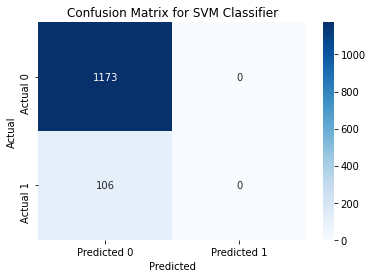

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
cm_rf_clf_df = pd.DataFrame(cm_rf_clf, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
cm_rf_clf_df

# visualize cm
sns.heatmap(cm_rf_clf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [51]:

# get data for produse_3 with with equal number of 1s and 0s
y_test.value_counts()
# take only 106 rows with 1s and 0s
y_test_0 = y_test[y_test == 0].sample(n=106)
y_test_1 = y_test[y_test == 1].sample(n=106)
# combine the two series
y_test_01 = pd.concat([y_test_0, y_test_1])

# x_test be same as y_test
X_test = X_test.loc[y_test_01.index]

# convert to dataframe
y_test = pd.DataFrame(y_test_01)
X_test = pd.DataFrame(X_test)



PRODUSE_3
1.0          4
0.0          3
dtype: int64

# ANN

In [58]:
# imports
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [59]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=10, batch_size=12)

Epoch 1/10


ValueError: in user code:

    /Users/vedanshi/.local/lib/python3.8/site-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /Users/vedanshi/.local/lib/python3.8/site-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /Users/vedanshi/.local/lib/python3.8/site-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /Users/vedanshi/.local/lib/python3.8/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/vedanshi/.local/lib/python3.8/site-packages/keras/engine/input_spec.py:212 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 19)


In [61]:
# Get values from the test dataframes that have the same 0s and 1s for Produse_3 
y_test

,PRODUSE_3
2942,NaN
5468,NaN
3539,NaN
2263,NaN
15,NaN
...,...
3970,NaN
4377,NaN
1446,NaN
5404,NaN


In [60]:
# auc for random forest classifier
from sklearn.metrics import roc_auc_score
y_pred_rf_clf = rf_clf_cv.predict(X_test)
auc_rf = roc_auc_score(y_test, y_pred_rf_clf)

y_pred_ada_clf = ada_clf_cv.predict(X_test)
auc_ada = roc_auc_score(y_test, y_pred_ada_clf)

y_pred_xgb_clf = xgb_clf_cv.predict(X_test)
auc_xgb = roc_auc_score(y_test, y_pred_xgb_clf)

# plot bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'], [auc_rf, auc_ada, auc_xgb])
ax.set_title('AUC for Random Forest Classifier, AdaBoost Classifier, XGBoost Classifier')
ax.set_ylabel('AUC')
plt.show()


# plot roc curve
from sklearn.metrics import roc_curve
fpr_rf_clf, tpr_rf_clf, thresholds_rf_clf = roc_curve(y_test, y_pred_rf_clf)
fpr_ada_clf, tpr_ada_clf, thresholds_ada_clf = roc_curve(y_test, y_pred_ada_clf)
fpr_xgb_clf, tpr_xgb_clf, thresholds_xgb_clf = roc_curve(y_test, y_pred_xgb_clf)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr_rf_clf, tpr_rf_clf, label='Random Forest Classifier')
ax.plot(fpr_ada_clf, tpr_ada_clf, label='AdaBoost Classifier')
ax.plot(fpr_xgb_clf, tpr_xgb_clf, label='XGBoost Classifier')
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# visualize the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='PRODUSE_3')
plt.plot(regressor.predict(X_test), color='blue', label='Predicted PRODUSE_3')
plt.title('PRODUSE_3 Prediction')
plt.xlabel('Observation')
plt.ylabel('PRODUSE_3')


**Leaving the below because I am not sure if any can help visualize the above**

In [ ]:
# visualize the neural network
from keras.utils.vis_utils import plot_model
plot_model(regressor, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# compare predicted and actual stock prices in test data
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = dataset_test[['Open']]

dataset_total = pd.concat((dataset_test['Open'], dataset_test['Open']), axis=0)
# get list of prices
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)

# scale test data using the train data scaler -- transform insead of 
# fit_transform to use the same scaler
inputs_scaled = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = dataset_test.iloc[:, 1:2].values
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

In [52]:
# get accuracy from the neural network
from sklearn.metrics import accuracy_score
accuracy_score(y_test, regressor.predict(X_test))

# visualize the important information from the neural network
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(regressor.predict(X_test), color='blue', label='Predicted PRODUSE_3')
plt.plot(y_test, color='red', label='PRODUSE_3')
plt.title('PRODUSE_3 Prediction')
plt.xlabel('Observation')


NameError: name 'regressor' is not defined

In [ ]:
# check to see if neural network is good
# get data for produse_3 with with equal number of 1s and 0s


In [ ]:
# visualize using graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(rf_clf, out_file=None,
                            feature_names=X_train.columns,
                            class_names=['0', '1'],
                            filled=True, rounded=True,
                            special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
# visualize neural network using graphviz
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(regressor).create(prog='dot', format='svg'))



In [53]:
# same 1s and 0s dataframe for x_test and y_test
y_test.value_counts()
# take only 106 rows with 1s and 0s
y_test_0 = y_test[y_test == 0].sample(n=106)
y_test_1 = y_test[y_test == 1].sample(n=106)
# combine the two series
y_test_01 = pd.concat([y_test_0, y_test_1])
# x_test be same as y_test
X_test = X_test.loc[y_test_01.index]
# convert to dataframe
y_test = pd.DataFrame(y_test_01)

y_test

,PRODUSE_3
2942,NaN
5468,NaN
3539,NaN
2263,NaN
15,NaN
...,...
3970,NaN
4377,NaN
1446,NaN
5404,NaN


In [ ]:
# Cross validation on the classifiers and regressors to get the best model

# hyperparameter tuning for the classifiers and regressors
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 3, 4, 5],
}

param_grid_ada = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.001, 0.01, 1],
}

param_grid_svm = {
    "C": [0.1, 1],
    "gamma": [1, 0.01],
}

param_grid_xgb = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 1],
    "max_depth": [5, 10],
}

param_grid_log = {
    "C": [0.1, 1, 10],
    "penalty": ["None", "l2"],
}

# cross validation
cv_values = [3, 5, 10]

# Initializing the models
# Classifiers
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
svm_clf = svm.SVC()
xgb_clf = XGBClassifier()
log_clf = LogisticRegression()
# Regressors
rf_reg = RandomForestRegressor()
ada_reg = AdaBoostRegressor()
svm_reg = svm.SVR()
xgb_reg = XGBRegressor()
log_reg = LinearRegression()

# Hyperparameter tuning
best_scores = {}

# initialize the scores
scores_rf_clf = []
scores_ada_clf = []
scores_svm_clf = []
scores_xgb_clf = []
scores_log_clf = []
scores_rf_reg = []
scores_ada_reg = []
scores_svm_reg = []
scores_xgb_reg = []
scores_log_reg = []

# loop through the cross validation values
for cv in cv_values:
    # Random Forest Classifier
    rf_clf_cv = GridSearchCV(rf_clf, param_grid_rf, cv=cv)
    rf_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for Random Forest Classifier: {rf_clf_cv.best_params_}')
    best_score_rf_clf = rf_clf_cv.best_score_
    scores_rf_clf.append(best_score_rf_clf)
    print(f'Best score for Random Forest Classifier: {best_score_rf_clf}')

    # AdaBoost Classifier
    ada_clf_cv = GridSearchCV(ada_clf, param_grid_ada, cv=cv)
    ada_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for AdaBoost Classifier: {ada_clf_cv.best_params_}')
    best_score_ada_clf = ada_clf_cv.best_score_
    scores_ada_clf.append(best_score_ada_clf)
    print(f'Best score for AdaBoost Classifier: {best_score_ada_clf}')

    # SVM Classifier
    svm_clf_cv = GridSearchCV(svm_clf, param_grid_svm, cv=cv)
    svm_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for SVM Classifier: {svm_clf_cv.best_params_}')
    best_score_svm_clf = svm_clf_cv.best_score_
    scores_svm_clf.append(best_score_svm_clf)
    print(f'Best score for SVM Classifier: {best_score_svm_clf}')

    # Gradient Boost Classifier
    xgb_clf_cv = GridSearchCV(xgb_clf, param_grid_xgb, cv=cv)
    xgb_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for Gradient Boost Classifier: {xgb_clf_cv.best_params_}')
    best_score_xgb_clf = xgb_clf_cv.best_score_
    scores_xgb_clf.append(best_score_xgb_clf)
    print(f'Best score for Gradient Boost Classifier: {best_score_xgb_clf}')

    # Logistic Regression Classifier
    log_clf_cv = GridSearchCV(log_clf, param_grid_log, cv=cv)
    log_clf_cv.fit(X_train, y_train)
    print(f'Best parameters for Logistic Regression Classifier: {log_clf_cv.best_params_}')
    best_score_log_clf = log_clf_cv.best_score_
    scores_log_clf.append(best_score_log_clf)
    print(f'Best score for Logistic Regression Classifier: {best_score_log_clf}')

    # Random Forest Regressor
    rf_reg_cv = GridSearchCV(rf_reg, param_grid_rf, cv=cv)
    rf_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for Random Forest Regressor: {rf_reg_cv.best_params_}')
    best_score_rf_reg = rf_reg_cv.best_score_
    scores_rf_reg.append(best_score_rf_reg)
    print(f'Best score for Random Forest Regressor: {best_score_rf_reg}')

    # AdaBoost Regressor
    ada_reg_cv = GridSearchCV(ada_reg, param_grid_ada, cv=cv)
    ada_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for AdaBoost Regressor: {ada_reg_cv.best_params_}')
    best_score_ada_reg = ada_reg_cv.best_score_
    scores_ada_reg.append(best_score_ada_reg)
    print(f'Best score for AdaBoost Regressor: {best_score_ada_reg}')

    # SVM Regressor
    svm_reg_cv = GridSearchCV(svm_reg, param_grid_svm, cv=cv)
    svm_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for SVM Regressor: {svm_reg_cv.best_params_}')
    best_score_svm_reg = svm_reg_cv.best_score_
    scores_svm_reg.append(best_score_svm_reg)
    print(f'Best score for SVM Regressor: {best_score_svm_reg}')

    # Gradient Boost Regressor
    xgb_reg_cv = GridSearchCV(xgb_reg, param_grid_xgb, cv=cv)
    xgb_reg_cv.fit(X_train, y_train)
    print(f'Best parameters for Gradient Boost Regressor: {xgb_reg_cv.best_params_}')
    best_score_xgb_reg = xgb_reg_cv.best_score_
    scores_xgb_reg.append(best_score_xgb_reg)
    print(f'Best score for Gradient Boost Regressor: {best_score_xgb_reg}')
    

# create a dataframe to store the results
model_score_df = pd.DataFrame({
    'Random Forest Classifier': scores_rf_clf, 
    'AdaBoost Classifier': scores_ada_clf,
    'SVM Classifier': scores_svm_clf,
    'Gradient Boost Classifier': scores_xgb_clf,
    'Logistic Regression Classifier': scores_log_clf,
    'Random Forest Regressor': scores_rf_reg,
    'AdaBoost Regressor': scores_ada_reg,
    'SVM Regressor': scores_svm_reg,
    'Gradient Boost Regressor': scores_xgb_reg,
    })


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
# get f1, roc, and accuracy scores for best models
best_models = {
    'Random Forest Classifier': rf_clf_cv,
    'SVM Classifier': svm_clf_cv,
    'Gradient Boost Classifier': xgb_clf_cv,
}

f1_scores = []
roc_auc_scores = []
accuracy_scores = []

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    f1_score = f1_score(y_test, y_pred)
    roc_auc_score = roc_auc_score(y_test, y_pred)
    accuracy_score = accuracy_score(y_test, y_pred)
    f1_scores.append(f1_score)
    roc_auc_scores.append(roc_auc_score)
    accuracy_scores.append(accuracy_score)

# plot the f1, roc, and accuracy scores for best models
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=list(best_models.keys()), y=f1_scores, ax=ax[0])
ax[0].set_title('F1 Scores')
sns.barplot(x=list(best_models.keys()), y=roc_auc_scores, ax=ax[1])
ax[1].set_title('ROC AUC Scores')
sns.barplot(x=list(best_models.keys()), y=accuracy_scores, ax=ax[2])
ax[2].set_title('Accuracy Scores')

# plot the f1, roc, and accuracy scores for best models
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=model_score_df.mean().sort_values(ascending=False).index, y=model_score_df.mean().sort_values(ascending=False), ax=ax[0])
ax[0].set_title('Mean Scores')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
sns.barplot(x=model_score_df.std().sort_values(ascending=False).index, y=model_score_df.std().sort_values(ascending=False), ax=ax[1])
ax[1].set_title('Standard Deviation of Scores')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
sns.barplot(x=model_score_df.max().sort_values(ascending=False).index, y=model_score_df.max().sort_values(ascending=False), ax=ax[2])
ax[2].set_title('Max Scores')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
plt.show()

In [57]:
# oversample the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
oversample = RandomOverSampler(sampling_strategy=0.5)
X_train, y_train = sm.fit_resample(X_train, y_train)

# create confusion matrix on oversampled data
from sklearn.metrics import confusion_matrix
rf_clf.fit(X_train, y_train)
cm_rf_clf_df = pd.DataFrame(confusion_matrix(y_test, rf_clf.predict(X_test)),
                            columns=['Predicted 0', 'Predicted 1'],
                            index=['Actual 0', 'Actual 1'])

display(cm_rf_clf_df)

ValueError: Found input variables with inconsistent numbers of samples: [212, 1534]

In [ ]:
# import build and test
from build_and_test import build_and_test

roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")

In [55]:
%pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.3 MB/s eta 0:00:0000:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
Note: you may need to restart the kernel to use updated packages.
